# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). The dataset you will be working on is CIFAR-10. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  
    1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  
    1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  
    1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?  
    2.2 *(1 point)* How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?  
    2.3 *(1 point)* How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.  
    2.4 *(1 point)* Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?  
    2.5 *(1 point)* What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?  

The dataset you will be working on is CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. **You have to ensure the architecture meets this constraint by verifying and printing out the number of parameters with model.summary(). Please follow the submission format to be eligible for this extra credit.**

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

2025-12-07 05:54:25.936065: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-07 05:54:26.017945: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-12-07 05:54:27.626919: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:

tf.config.set_visible_devices([], 'GPU')


W0000 00:00:1765061670.348706  457858 gpu_device.cc:2431] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1765061670.354219  457858 gpu_device.cc:2431] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.


In [3]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)
y_test = y_test.reshape(-1,)


print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000,)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000,)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000,)


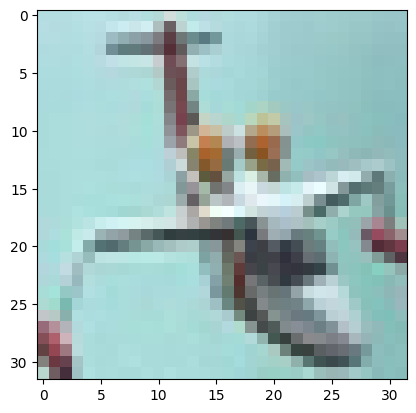

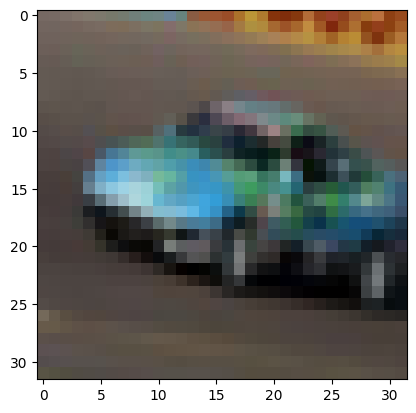

In [4]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[44999])
plt.show()
imgplot = plt.imshow(X_test[4999])
plt.show()

## 1. Coding tasks

1. Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.

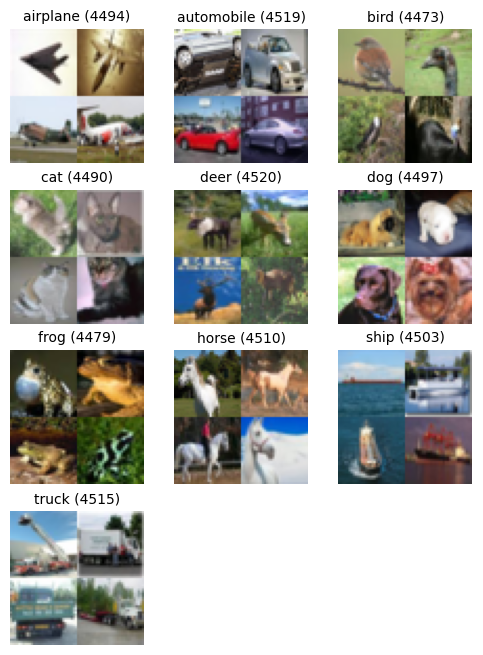

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Count how many samples belong to each class
class_counts = np.bincount(y_train.flatten(), minlength=10)

# For each class, collect indices of all images
class_indices = {i: np.where(y_train.flatten() == i)[0] for i in range(10)}

# Plot setup
fig, axes = plt.subplots(4, 3, figsize=(6, 8))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]

    # Randomly pick 4 images from this class
    idxs = np.random.choice(class_indices[i], 4, replace=False)
    imgs = X_train[idxs]

    # Create a small 2x2 grid inside the subplot
    combined = np.zeros((64, 64, 3), dtype=np.uint8)  # 32*2 = 64 pixels per side
    combined[:32, :32] = imgs[0]
    combined[:32, 32:] = imgs[1]
    combined[32:, :32] = imgs[2]
    combined[32:, 32:] = imgs[3]

    ax.imshow(combined)
    ax.set_title(f"{class_names[i]} ({class_counts[i]})", fontsize=10)
    ax.axis("off")

# Turn off remaining unused subplots
for ax in axes[10:]:
    ax.axis("off")

plt.show()


In [6]:
# Convert pixel values from 0–255 to 0–1 (normalizing)
X_train_norm = X_train.astype("float32") / 255.0
X_val_norm = X_val.astype("float32") / 255.0
X_test_norm = X_test.astype("float32") / 255.0

print("Data normalized: pixel values are now between 0 and 1.")
print("Random normalized pixel: ", X_train_norm[44998][16][16])

Data normalized: pixel values are now between 0 and 1.
Random normalized pixel:  [0.09803922 0.07058824 0.0627451 ]


In [7]:
#training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Training on:", device)

# Convert to tensors
X_train_t = torch.tensor(X_train_norm, dtype=torch.float32).permute(0, 3, 1, 2)
X_val_t   = torch.tensor(X_val_norm, dtype=torch.float32).permute(0, 3, 1, 2)
X_test_t  = torch.tensor(X_test_norm, dtype=torch.float32).permute(0, 3, 1, 2)

y_train_t = torch.tensor(y_train.reshape(-1), dtype=torch.long)
y_val_t   = torch.tensor(y_val.reshape(-1), dtype=torch.long)
y_test_t  = torch.tensor(y_test.reshape(-1), dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=128, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=128)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=128)

Training on: cuda


2. First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers

In [8]:
# -------------------------
# Model
# -------------------------
class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout2d(0.2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            nn.Dropout2d(0.2)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.2),
            nn.MaxPool2d(2)
        )

        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout2d(0.2),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout2d(0.2)
        )

        self.gap = nn.AdaptiveAvgPool2d((1, 1))

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(0.35),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.gap(x)
        x = self.fc(x)
        return x

model = MyCNN().to(device)
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# -------------------------
# Train + Evaluate
# -------------------------
train_losses = []
val_accuracies = []

def train_one_epoch():
    model.train()
    total_loss = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X).argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    return correct / total


# -------------------------
# Run training
# -------------------------
for epoch in range(1, 31):
    train_loss = train_one_epoch()
    val_acc = evaluate(val_loader)

    train_losses.append(train_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch:2d} | Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

# -------------------------
# Test accuracy
# -------------------------
test_acc = evaluate(test_loader)
print("Test accuracy:", test_acc)


MyCNN(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout2d(p=0.2, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout2d(p=0.2, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout2d(p=0.2, inplace=False)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): D

Epoch  1 | Loss: 1.5139 | Val Acc: 0.5846


Epoch  2 | Loss: 1.1245 | Val Acc: 0.6544


Epoch  3 | Loss: 0.9724 | Val Acc: 0.7074


Epoch  4 | Loss: 0.8542 | Val Acc: 0.7386


Epoch  5 | Loss: 0.7544 | Val Acc: 0.7716


Epoch  6 | Loss: 0.6906 | Val Acc: 0.7954


Epoch  7 | Loss: 0.6335 | Val Acc: 0.8020


Epoch  8 | Loss: 0.5870 | Val Acc: 0.8142


Epoch  9 | Loss: 0.5515 | Val Acc: 0.8246


Epoch 10 | Loss: 0.5143 | Val Acc: 0.8274


Epoch 11 | Loss: 0.4843 | Val Acc: 0.8334


Epoch 12 | Loss: 0.4560 | Val Acc: 0.8396


Epoch 13 | Loss: 0.4307 | Val Acc: 0.8402


Epoch 14 | Loss: 0.4151 | Val Acc: 0.8454


Epoch 15 | Loss: 0.3906 | Val Acc: 0.8516


Epoch 16 | Loss: 0.3773 | Val Acc: 0.8602


Epoch 17 | Loss: 0.3585 | Val Acc: 0.8604


Epoch 18 | Loss: 0.3495 | Val Acc: 0.8612


Epoch 19 | Loss: 0.3272 | Val Acc: 0.8578


Epoch 20 | Loss: 0.3125 | Val Acc: 0.8664


Epoch 21 | Loss: 0.3032 | Val Acc: 0.8668


Epoch 22 | Loss: 0.2932 | Val Acc: 0.8688


Epoch 23 | Loss: 0.2810 | Val Acc: 0.8742


Epoch 24 | Loss: 0.2691 | Val Acc: 0.8716


Epoch 25 | Loss: 0.2608 | Val Acc: 0.8686


Epoch 26 | Loss: 0.2486 | Val Acc: 0.8706


Epoch 27 | Loss: 0.2434 | Val Acc: 0.8698


Epoch 28 | Loss: 0.2377 | Val Acc: 0.8674


Epoch 29 | Loss: 0.2242 | Val Acc: 0.8720


Epoch 30 | Loss: 0.2182 | Val Acc: 0.8716


Test accuracy: 0.8781


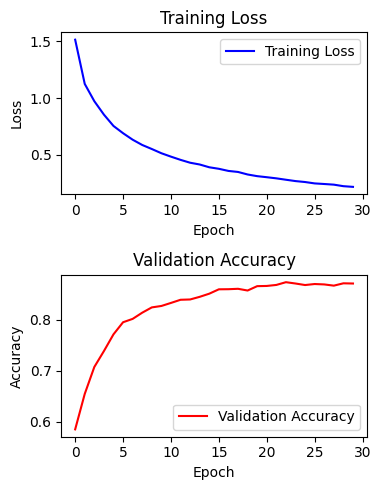

In [9]:
# Visualize training and validation performance
f, ax = plt.subplots(2, 1, figsize=(4, 5))

# Plot training loss
ax[0].plot(train_losses, color='b', label='Training Loss')
ax[0].set_title("Training Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Plot validation accuracy
ax[1].plot(val_accuracies, color='r', label='Validation Accuracy')
ax[1].set_title("Validation Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.tight_layout()
plt.show()


3. Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().

In [10]:
# -------------------------
# My model resnet
# -------------------------
import torch.nn.functional as F
import torch.nn as nn
import torch

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return x * self.fc(x)


class ResBlock(nn.Module):
    def __init__(self, in_c, out_c, dropout=0.35):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),

            nn.Conv2d(out_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
        )

        self.shortcut = nn.Conv2d(in_c, out_c, 1) if in_c != out_c else nn.Identity()
        self.se = SEBlock(out_c)

    def forward(self, x):
        out = self.conv(x)
        out = self.se(out)
        return F.relu(out + self.shortcut(x))


class BetterCNN(nn.Module):
    def __init__(self):
        super().__init__()

        # keep original width
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.layer1 = nn.Sequential(
            ResBlock(64, 128),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            ResBlock(128, 256),
            nn.MaxPool2d(2)
        )

        # add one extra block here (cheap)
        self.layer3 = nn.Sequential(
            ResBlock(256, 278),
            ResBlock(278, 278)
        )

        self.gap = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(278, 10)

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.gap(x)
        x = torch.flatten(x, 1)
        return self.fc(x)


model = BetterCNN().to(device)


In [11]:
# -------------------------
# Count Trainable Parameters
# -------------------------
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

params = count_params(model)
print(f"\nTotal Trainable Parameters: {params:,}  ({params/1e6:.3f}M)\n")



Total Trainable Parameters: 3,986,382  (3.986M)



In [12]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# CIFAR-10 normalization constants
CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR10_STD  = (0.2023, 0.1994, 0.2010)

# -------------------------
# Training Transformations
# -------------------------
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.RandomGrayscale(p=0.07),
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.15), ratio=(0.3, 3.3), value=0, inplace=False)
])

# -------------------------
# Validation/Test Transformations
# -------------------------
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD),
])

# -------------------------
# Convert EXISTING NumPy arrays → torch dataset using transforms
# -------------------------

class NumpyCIFAR(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        
        # convert from NumPy (H,W,C) → PIL Image for transforms
        img = transforms.ToPILImage()(img)
        if self.transform:
            img = self.transform(img)
        return img, label

# create datasets with transforms
train_dataset = NumpyCIFAR(X_train, y_train, transform=train_transform)
val_dataset   = NumpyCIFAR(X_val,   y_val,   transform=val_transform)
test_dataset  = NumpyCIFAR(X_test,  y_test,  transform=val_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=256, shuffle=False)

print("DataLoaders with augmentation are ready.")


DataLoaders with augmentation are ready.


In [13]:
# -------------------------
# Label Smoothing Cross Entropy
# -------------------------
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super().__init__()
        assert 0.0 <= smoothing < 1.0
        self.s = smoothing

    def forward(self, logits, target):
        n_classes = logits.size(-1)

        # log probabilities
        log_probs = F.log_softmax(logits, dim=-1)

        # create smoothed targets
        with torch.no_grad():
            true = torch.zeros_like(log_probs)
            true.fill_(self.s / (n_classes - 1))
            true.scatter_(1, target.unsqueeze(1), 1 - self.s)

        return -(true * log_probs).sum(dim=1).mean()


In [14]:
# Assuming optim and device are defined elsewhere
import torch.optim as optim 

criterion = LabelSmoothingCrossEntropy(smoothing=0.05)

# MODIFICATION: Added weight_decay (L2 regularization)
optimizer = optim.SGD(
    model.parameters(),
    lr=0.2,
    momentum=0.9,
    weight_decay=1e-3,
    nesterov=True
)
scheduler = optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max = 100,
    eta_min = 1e-5
)

# Setup for Gradient Clipping
MAX_NORM = 10.0 

# Early stopping
best_val_acc = 0
patience = 20 
wait = 0

train_losses = []
val_accuracies = []

In [15]:
import torch
import numpy as np
import random
import torch.nn.functional as F

def cutmix_data(x, y, alpha=1.0):
    """
    x: batch images (B,C,H,W)
    y: batch labels (B,)
    returns: mixed_x, y_a, y_b, lambda
    """

    if alpha <= 0:
        return x, y, y, 1.0

    lam = np.random.beta(alpha, alpha)

    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)

    y_a = y
    y_b = y[index]

    # bounding box
    _, _, H, W = x.size()
    cut_w = int(W * np.sqrt(1 - lam))
    cut_h = int(H * np.sqrt(1 - lam))

    # random center
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    x1 = np.clip(cx - cut_w // 2, 0, W)
    x2 = np.clip(cx + cut_w // 2, 0, W)
    y1 = np.clip(cy - cut_h // 2, 0, H)
    y2 = np.clip(cy + cut_h // 2, 0, H)

    # apply patch
    x[:, :, y1:y2, x1:x2] = x[index][:, :, y1:y2, x1:x2]

    lam = 1 - ((x2 - x1) * (y2 - y1)) / (W * H)

    return x, y_a, y_b, lam


In [16]:
def train_one_epoch():
    model.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        # apply cutmix
        X_cut, y_a, y_b, lam = cutmix_data(X, y, alpha=1.0)

        # forward
        out = model(X_cut)

        # compute mixed loss
        loss = lam * criterion(out, y_a) + (1 - lam) * criterion(out, y_b)

        loss.backward()
        
        # >>> MODIFICATION: Gradient Clipping
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=MAX_NORM)
        
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)


def evaluate(loader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X).argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    return correct / total

In [17]:
# -------------------------
# Train (with checkpoint saving)
# -------------------------

import os

# Make sure checkpoint folder exists
os.makedirs("checkpoints", exist_ok=True)
BEST_MODEL_PATH = "checkpoints/best_model.pt"

for epoch in range(1, 501):

    train_loss = train_one_epoch()
    val_acc = evaluate(val_loader)

    train_losses.append(train_loss)
    val_accuracies.append(val_acc)

    scheduler.step()

    print(f"Epoch {epoch:02d} | Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

    # EARLY STOP & SAVE BEST CHECKPOINT
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        wait = 0
        best_state = model.state_dict()  # keep copy in RAM
        
        # --- SAVE TO DISK (important if session dies) ---
        torch.save(best_state, BEST_MODEL_PATH)
        print(f"  ➤ New best model saved at epoch {epoch} (val_acc={val_acc:.4f})")
    else:
        wait += 1
        if wait >= patience:
            print("\nEarly stopping triggered.")
            break

# Load best model (whether early stopped or completed)
model.load_state_dict(best_state)
print("\nBest validation accuracy:", best_val_acc)


Epoch 01 | Loss: 2.0125 | Val Acc: 0.4300
  ➤ New best model saved at epoch 1 (val_acc=0.4300)


Epoch 02 | Loss: 1.7993 | Val Acc: 0.5538
  ➤ New best model saved at epoch 2 (val_acc=0.5538)


Epoch 03 | Loss: 1.7135 | Val Acc: 0.4942


Epoch 04 | Loss: 1.6774 | Val Acc: 0.6414
  ➤ New best model saved at epoch 4 (val_acc=0.6414)


Epoch 05 | Loss: 1.6366 | Val Acc: 0.6564
  ➤ New best model saved at epoch 5 (val_acc=0.6564)


Epoch 06 | Loss: 1.6367 | Val Acc: 0.6848
  ➤ New best model saved at epoch 6 (val_acc=0.6848)


Epoch 07 | Loss: 1.5986 | Val Acc: 0.5624


Epoch 08 | Loss: 1.5826 | Val Acc: 0.6228


Epoch 09 | Loss: 1.6198 | Val Acc: 0.7112
  ➤ New best model saved at epoch 9 (val_acc=0.7112)


Epoch 10 | Loss: 1.5880 | Val Acc: 0.6792


Epoch 11 | Loss: 1.5790 | Val Acc: 0.6028


Epoch 12 | Loss: 1.5893 | Val Acc: 0.6858


Epoch 13 | Loss: 1.5792 | Val Acc: 0.6598


Epoch 14 | Loss: 1.6031 | Val Acc: 0.6492


Epoch 15 | Loss: 1.5758 | Val Acc: 0.7260
  ➤ New best model saved at epoch 15 (val_acc=0.7260)


Epoch 16 | Loss: 1.5633 | Val Acc: 0.6718


Epoch 17 | Loss: 1.5515 | Val Acc: 0.7092


Epoch 18 | Loss: 1.5487 | Val Acc: 0.6924


Epoch 19 | Loss: 1.5544 | Val Acc: 0.7002


Epoch 20 | Loss: 1.5598 | Val Acc: 0.7084


Epoch 21 | Loss: 1.5455 | Val Acc: 0.7354
  ➤ New best model saved at epoch 21 (val_acc=0.7354)


Epoch 22 | Loss: 1.5705 | Val Acc: 0.6084


Epoch 23 | Loss: 1.5564 | Val Acc: 0.7388
  ➤ New best model saved at epoch 23 (val_acc=0.7388)


Epoch 24 | Loss: 1.5320 | Val Acc: 0.6730


Epoch 25 | Loss: 1.5739 | Val Acc: 0.7536
  ➤ New best model saved at epoch 25 (val_acc=0.7536)


Epoch 26 | Loss: 1.5404 | Val Acc: 0.7518


Epoch 27 | Loss: 1.5499 | Val Acc: 0.6920


Epoch 28 | Loss: 1.5497 | Val Acc: 0.7556
  ➤ New best model saved at epoch 28 (val_acc=0.7556)


Epoch 29 | Loss: 1.5376 | Val Acc: 0.7636
  ➤ New best model saved at epoch 29 (val_acc=0.7636)


Epoch 30 | Loss: 1.5441 | Val Acc: 0.6234


Epoch 31 | Loss: 1.5171 | Val Acc: 0.7598


Epoch 32 | Loss: 1.5155 | Val Acc: 0.7350


Epoch 33 | Loss: 1.5266 | Val Acc: 0.7314


Epoch 34 | Loss: 1.5100 | Val Acc: 0.7820
  ➤ New best model saved at epoch 34 (val_acc=0.7820)


Epoch 35 | Loss: 1.5305 | Val Acc: 0.6576


Epoch 36 | Loss: 1.5098 | Val Acc: 0.7756


Epoch 37 | Loss: 1.5244 | Val Acc: 0.7428


Epoch 38 | Loss: 1.4825 | Val Acc: 0.7622


Epoch 39 | Loss: 1.5128 | Val Acc: 0.7856
  ➤ New best model saved at epoch 39 (val_acc=0.7856)


Epoch 40 | Loss: 1.5022 | Val Acc: 0.7078


Epoch 41 | Loss: 1.5026 | Val Acc: 0.7750


Epoch 42 | Loss: 1.5298 | Val Acc: 0.7380


Epoch 43 | Loss: 1.4909 | Val Acc: 0.7708


Epoch 44 | Loss: 1.4934 | Val Acc: 0.7760


Epoch 45 | Loss: 1.4899 | Val Acc: 0.7738


Epoch 46 | Loss: 1.4646 | Val Acc: 0.7728


Epoch 47 | Loss: 1.5051 | Val Acc: 0.7716


Epoch 48 | Loss: 1.4547 | Val Acc: 0.7676


Epoch 49 | Loss: 1.4943 | Val Acc: 0.8120
  ➤ New best model saved at epoch 49 (val_acc=0.8120)


Epoch 50 | Loss: 1.4616 | Val Acc: 0.6922


Epoch 51 | Loss: 1.4497 | Val Acc: 0.7606


Epoch 52 | Loss: 1.4800 | Val Acc: 0.7964


Epoch 53 | Loss: 1.4505 | Val Acc: 0.7894


Epoch 54 | Loss: 1.4644 | Val Acc: 0.8080


Epoch 55 | Loss: 1.4591 | Val Acc: 0.7886


Epoch 56 | Loss: 1.4614 | Val Acc: 0.7718


Epoch 57 | Loss: 1.4145 | Val Acc: 0.8360
  ➤ New best model saved at epoch 57 (val_acc=0.8360)


Epoch 58 | Loss: 1.4214 | Val Acc: 0.7894


Epoch 59 | Loss: 1.4273 | Val Acc: 0.8254


Epoch 60 | Loss: 1.4055 | Val Acc: 0.8304


Epoch 61 | Loss: 1.3816 | Val Acc: 0.7594


Epoch 62 | Loss: 1.4297 | Val Acc: 0.8268


Epoch 63 | Loss: 1.3651 | Val Acc: 0.8332


Epoch 64 | Loss: 1.4177 | Val Acc: 0.8430
  ➤ New best model saved at epoch 64 (val_acc=0.8430)


Epoch 65 | Loss: 1.3770 | Val Acc: 0.8300


Epoch 66 | Loss: 1.4082 | Val Acc: 0.8432
  ➤ New best model saved at epoch 66 (val_acc=0.8432)


Epoch 67 | Loss: 1.3925 | Val Acc: 0.8372


Epoch 68 | Loss: 1.3667 | Val Acc: 0.8480
  ➤ New best model saved at epoch 68 (val_acc=0.8480)


Epoch 69 | Loss: 1.4003 | Val Acc: 0.8618
  ➤ New best model saved at epoch 69 (val_acc=0.8618)


Epoch 70 | Loss: 1.3217 | Val Acc: 0.8490


Epoch 71 | Loss: 1.3683 | Val Acc: 0.8704
  ➤ New best model saved at epoch 71 (val_acc=0.8704)


Epoch 72 | Loss: 1.3432 | Val Acc: 0.8672


Epoch 73 | Loss: 1.3583 | Val Acc: 0.8628


Epoch 74 | Loss: 1.3581 | Val Acc: 0.8782
  ➤ New best model saved at epoch 74 (val_acc=0.8782)


Epoch 75 | Loss: 1.3386 | Val Acc: 0.8340


Epoch 76 | Loss: 1.3043 | Val Acc: 0.8752


Epoch 77 | Loss: 1.3278 | Val Acc: 0.8938
  ➤ New best model saved at epoch 77 (val_acc=0.8938)


Epoch 78 | Loss: 1.3300 | Val Acc: 0.8576


Epoch 79 | Loss: 1.2844 | Val Acc: 0.8700


Epoch 80 | Loss: 1.2928 | Val Acc: 0.8798


Epoch 81 | Loss: 1.2831 | Val Acc: 0.8922


Epoch 82 | Loss: 1.2899 | Val Acc: 0.8902


Epoch 83 | Loss: 1.2773 | Val Acc: 0.8946
  ➤ New best model saved at epoch 83 (val_acc=0.8946)


Epoch 84 | Loss: 1.2990 | Val Acc: 0.9100
  ➤ New best model saved at epoch 84 (val_acc=0.9100)


Epoch 85 | Loss: 1.2634 | Val Acc: 0.9094


Epoch 86 | Loss: 1.2508 | Val Acc: 0.9108
  ➤ New best model saved at epoch 86 (val_acc=0.9108)


Epoch 87 | Loss: 1.2409 | Val Acc: 0.9172
  ➤ New best model saved at epoch 87 (val_acc=0.9172)


Epoch 88 | Loss: 1.2494 | Val Acc: 0.9110


Epoch 89 | Loss: 1.2211 | Val Acc: 0.9166


Epoch 90 | Loss: 1.2285 | Val Acc: 0.9234


  ➤ New best model saved at epoch 90 (val_acc=0.9234)


Epoch 91 | Loss: 1.1950 | Val Acc: 0.9216


Epoch 92 | Loss: 1.2243 | Val Acc: 0.9276


  ➤ New best model saved at epoch 92 (val_acc=0.9276)


Epoch 93 | Loss: 1.1719 | Val Acc: 0.9310
  ➤ New best model saved at epoch 93 (val_acc=0.9310)


Epoch 94 | Loss: 1.1599 | Val Acc: 0.9294


Epoch 95 | Loss: 1.1778 | Val Acc: 0.9318
  ➤ New best model saved at epoch 95 (val_acc=0.9318)


Epoch 96 | Loss: 1.1942 | Val Acc: 0.9328
  ➤ New best model saved at epoch 96 (val_acc=0.9328)


Epoch 97 | Loss: 1.1706 | Val Acc: 0.9332
  ➤ New best model saved at epoch 97 (val_acc=0.9332)


Epoch 98 | Loss: 1.1931 | Val Acc: 0.9324


Epoch 99 | Loss: 1.1409 | Val Acc: 0.9332


Epoch 100 | Loss: 1.1566 | Val Acc: 0.9328


Epoch 101 | Loss: 1.1996 | Val Acc: 0.9346
  ➤ New best model saved at epoch 101 (val_acc=0.9346)


Epoch 102 | Loss: 1.1744 | Val Acc: 0.9330


Epoch 103 | Loss: 1.1467 | Val Acc: 0.9336


Epoch 104 | Loss: 1.1685 | Val Acc: 0.9318


Epoch 105 | Loss: 1.1748 | Val Acc: 0.9306


Epoch 106 | Loss: 1.1736 | Val Acc: 0.9320


Epoch 107 | Loss: 1.1852 | Val Acc: 0.9326


Epoch 108 | Loss: 1.1591 | Val Acc: 0.9320


Epoch 109 | Loss: 1.2042 | Val Acc: 0.9278


Epoch 110 | Loss: 1.1883 | Val Acc: 0.9270


Epoch 111 | Loss: 1.1595 | Val Acc: 0.9254


Epoch 112 | Loss: 1.2173 | Val Acc: 0.9296


Epoch 113 | Loss: 1.2198 | Val Acc: 0.9156


Epoch 114 | Loss: 1.2278 | Val Acc: 0.9140


Epoch 115 | Loss: 1.2156 | Val Acc: 0.9194


Epoch 116 | Loss: 1.2332 | Val Acc: 0.9144


Epoch 117 | Loss: 1.2335 | Val Acc: 0.9046


Epoch 118 | Loss: 1.2496 | Val Acc: 0.8948


Epoch 119 | Loss: 1.2556 | Val Acc: 0.8992


Epoch 120 | Loss: 1.2783 | Val Acc: 0.8938


Epoch 121 | Loss: 1.2832 | Val Acc: 0.8718

Early stopping triggered.

Best validation accuracy: 0.9346


In [18]:
# -------------------------
# Test Evaluation (loads best saved model)
# -------------------------

# Load best checkpoint from disk (safe even after crash)
if os.path.exists(BEST_MODEL_PATH):
    model.load_state_dict(torch.load(BEST_MODEL_PATH))
    print("Loaded best saved checkpoint for testing.")
else:
    print("Warning: No saved checkpoint found. Using current model state.")

model.eval()
test_correct = 0
test_total = 0
test_loss_total = 0

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)

        out = model(x)
        loss = criterion(out, y)

        test_loss_total += loss.item() * x.size(0)

        _, preds = out.max(1)
        test_correct += preds.eq(y).sum().item()
        test_total += y.size(0)

test_loss = test_loss_total / test_total
test_accuracy = test_correct / test_total

print("\n====================")
print("TEST RESULTS")
print("====================")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Loaded best saved checkpoint for testing.



TEST RESULTS
Test Loss: 0.5367
Test Accuracy: 0.9346


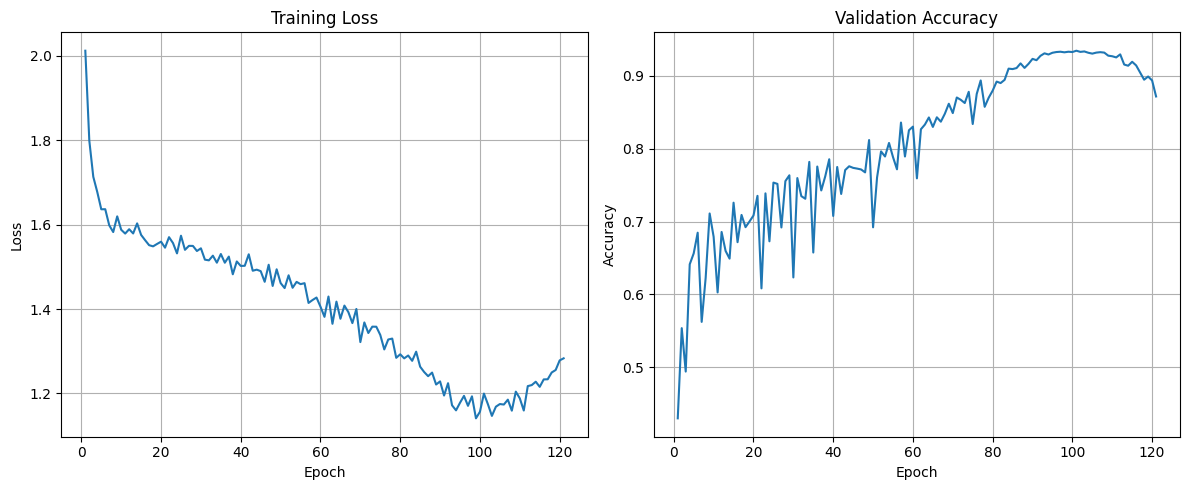

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, val_accuracies)
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


4. Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.

In [20]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.4

## 2. Open discussion questions

1. How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?

In [21]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.1

2. How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?

In [22]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.2

3. How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.

In [23]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.3

4. Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?

In [24]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.4

5. What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?

In [25]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.5